In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import fastprop
import os
from rdkit import Chem
import scipy
from matplotlib import cm
from matplotlib.colors import Normalize 
import seaborn as sns
from sklearn.metrics import mean_squared_error 
from pathlib import Path
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

colors = sns.color_palette(palette='Accent').as_hex()


Fastsolv performance on Leeds

In [2]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\final_results", "plain")
leeds_acetone: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_acetone_predictions.csv"))
leeds_benzene: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_benzene_predictions.csv"))
leeds_ethanol: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_ethanol_predictions.csv"))

leeds_all = pd.concat([leeds_acetone, leeds_benzene, leeds_ethanol], ignore_index=True, axis=0) 

In [15]:
def parity_plot(xs,ys, labels, colors):
    plt.figure(figsize=[6.4,4.8])
    fig, ax1 = plt.subplots()
    ax1.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
    ax1.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
    ax1.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
    for i in range(len(xs)):
        ax1.scatter(xs[i],ys[i], alpha =0.4, s = 30, edgecolors = 'black', color = colors[i], label = labels[i])
    ax1.set_xlim([-5, 2])
    ax1.set_ylim([-5,2])
    ax1.set_ylabel(r"$\hat{logS}$")
    ax1.set_xlabel(r"True $logS$")
    ax1.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
    ax1.spines[['right', 'top']].set_visible(False)
    return ax1

def stats(true, predicted): 
    mse = mean_squared_error(true, predicted)

    differences = np.abs(true - predicted)
    within_1_unit = differences <= 1
    percentage_within_1_unit = np.sum(within_1_unit) / len(true) * 100
    return mse, percentage_within_1_unit

MSE FastSolv= 0.9413025625273529 
Percentage within 1 logS for FastSolv = 72.81553398058253


<Figure size 640x480 with 0 Axes>

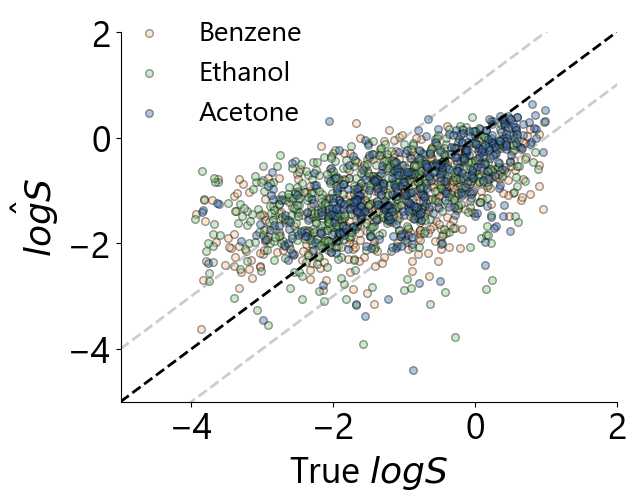

In [24]:
parity_plot([leeds_benzene['logS_true'], leeds_ethanol['logS_true'], leeds_acetone['logS_true']],
            [leeds_benzene['logS_pred'],leeds_ethanol['logS_pred'], leeds_acetone['logS_pred']], 
            ['Benzene', 'Ethanol', 'Acetone'], 
            [colors[2], colors[0], colors[4]])
mse, percentage_within_1_unit = stats(leeds_all['logS_true'], leeds_all['logS_pred'])
print("MSE FastSolv= " + f"{np.sqrt(mse)}", "\nPercentage within 1 logS for FastSolv = " + f"{percentage_within_1_unit}")

Custom fastsolv performance on Leeds

In [25]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\final_results", "custom")
leeds_acetone_custom: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_acetone_predictions.csv"))
leeds_benzene_custom: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_benzene_predictions.csv"))
leeds_ethanol_custom: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_ethanol_predictions.csv"))

leeds_all_custom = pd.concat([leeds_acetone_custom, leeds_benzene_custom, leeds_ethanol_custom], ignore_index=True, axis=0) 

MSE FastSolv-phys= 0.9363386063156621 
Percentage within 1 logS for FastSolv = 73.9251040221914


<Figure size 640x480 with 0 Axes>

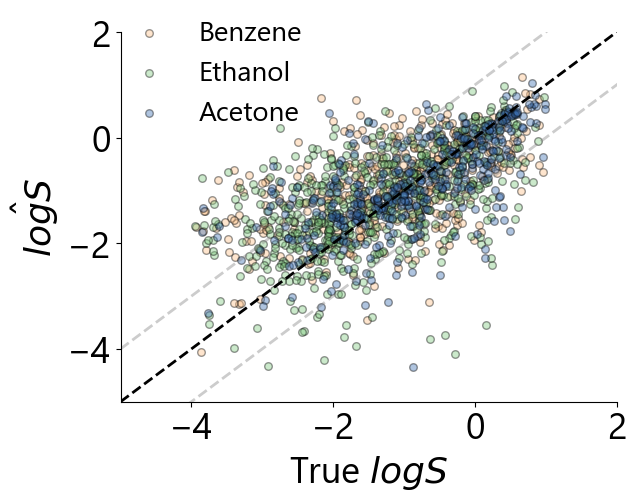

In [26]:
parity_plot([leeds_benzene_custom['logS_true'], leeds_ethanol_custom['logS_true'], leeds_acetone_custom['logS_true']],
            [leeds_benzene_custom['logS_pred'],leeds_ethanol_custom['logS_pred'], leeds_acetone_custom['logS_pred']], 
            ['Benzene', 'Ethanol', 'Acetone'], 
            [colors[2], colors[0], colors[4]])
mse_custom, percentage_within_1_unit_custom = stats(leeds_all_custom['logS_true'], leeds_all_custom['logS_pred'])
print("MSE FastSolv-phys= " + f"{np.sqrt(mse_custom)}", "\nPercentage within 1 logS for FastSolv = " + f"{percentage_within_1_unit_custom}")

Solprop performance on Leeds

In [27]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\final_results", "solprop")
leeds_acetone_solprop: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_acetone_vermeire_predictions.csv"))
leeds_acetone_solprop['logS_true'] = leeds_acetone['logS_true']
leeds_benzene_solprop: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_benzene_vermeire_predictions.csv"))
leeds_benzene_solprop['logS_true'] = leeds_benzene['logS_true']
leeds_ethanol_solprop: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_ethanol_vermeire_predictions.csv"))
leeds_ethanol_solprop['logS_true'] = leeds_ethanol['logS_true']

leeds_all_solprop = pd.concat([leeds_acetone_solprop, leeds_benzene_solprop, leeds_ethanol_solprop], ignore_index=True, axis=0) 

MSE Solprop= 2.0396862161230156 
Percentage within 1 logS for Solprop = 50.69348127600555


<Figure size 640x480 with 0 Axes>

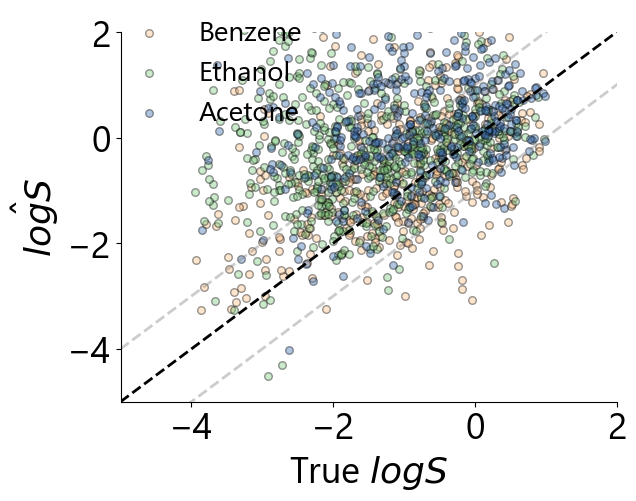

In [35]:
parity_plot([leeds_benzene_solprop['logS_true'], leeds_ethanol_solprop['logS_true'], leeds_acetone_solprop['logS_true']],
            [leeds_benzene_solprop['logST (method1) [log10(mol/L)]'],leeds_ethanol_solprop['logST (method1) [log10(mol/L)]'], leeds_acetone_solprop['logST (method1) [log10(mol/L)]']], 
            ['Benzene', 'Ethanol', 'Acetone'], 
            [colors[2], colors[0], colors[4]])
mse_solprop, percentage_within_1_unit_solprop = stats(leeds_all_solprop['logS_true'], leeds_all_solprop['logST (method1) [log10(mol/L)]'])
print("MSE Solprop= " + f"{np.sqrt(mse_solprop)}", "\nPercentage within 1 logS for Solprop = " + f"{percentage_within_1_unit_solprop}")

Krasnov performance

In [31]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\final_results", "custom")
training_performance: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "bigsoldb_downsample_predictions.csv"))
mse_training, percentage_within_1_unit_training = stats(training_performance['logS_true'], training_performance['logS_pred'])
print("MSE Krasnov training= " + f"{np.sqrt(mse_training)}", 
      "\nPercentage within 1 logS for Training = " + f"{percentage_within_1_unit_training}")

MSE Krasnov training= 0.28898128707243675 
Percentage within 1 logS for Training = 98.6490241764819


C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_28020\1544474061.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([-8, -6, -4, -2, 0, 2])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Fastsolv-phys training')

<Figure size 640x480 with 0 Axes>

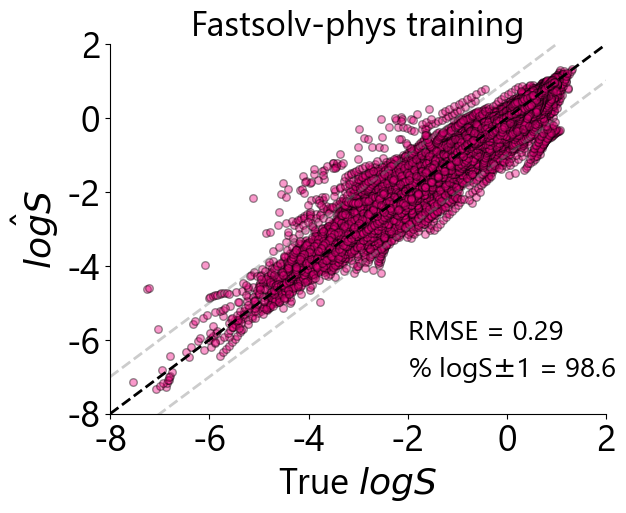

In [32]:
plt.figure(figsize=[6.4,4.8])
fig, ax1 = plt.subplots()

ax1.plot([-8, 8], [-8,8], linestyle = '--', linewidth = 2, color = 'black')
ax1.plot([-8, 8], [-9,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax1.plot([-8, 8], [-7,9], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)

ax1.scatter(training_performance['logS_true'],training_performance['logS_pred'], alpha =0.4, s = 30, edgecolors = 'black', color = colors[5])


ax1.set_xlim([-8, 2])
ax1.set_xticks([-8, -6, -4, -2, 0, 2])
ax1.set_xticklabels([-8, -6, -4, -2, 0, 2])
ax1.set_ylim([-8,2])
ax1.set_yticklabels([-8, -6, -4, -2, 0, 2])

ax1.set_ylabel(r"$\hat{logS}$")
ax1.set_xlabel(r"True $logS$")
ax1.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax1.spines[['right', 'top']].set_visible(False)
ax1.text(-2,-6, f"RMSE = {np.sqrt(mse_training):.2f}", fontsize = 20)
ax1.text(-2,-7, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_training:.1f}", fontsize = 20)
ax1.set_title("Fastsolv-phys training", fontsize = 25)

Label distributions

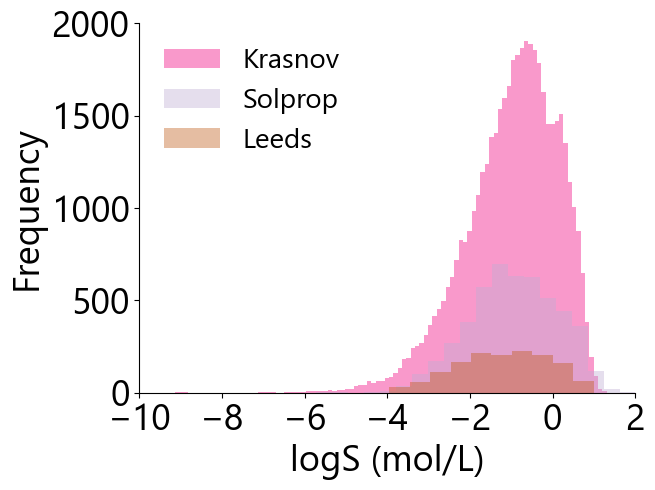

In [33]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\final_results", "custom")
solprop: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "solprop_nonaq_predictions.csv"))
training_performance['logS_true'].plot(kind='hist', bins=120, color = colors[5], alpha = 0.4, label = 'Krasnov')
solprop['logS_true'].plot(kind='hist', bins=20, alpha = 0.4, color = colors[1], label = 'Solprop')
leeds_all['logS_true'].plot(kind='hist', bins=10, alpha = 0.4, color = colors[6], label = 'Leeds')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("logS (mol/L)")
plt.xlim([-10, 2])
plt.xticks([-10, -8, -6, -4, -2, 0, 2 ])
plt.legend(prop={'size': 20}, loc = 'upper left', frameon = False) 
#plt.ylim([-10, 1200])
#plt.yticks([0, 400, 800, 1200])

Venn Diagram of solute overlap

In [37]:
training_performance[['solvent', 'solute']] = training_performance['smiles'].str.split('.', expand=True)
unique_solutes_krasnov = training_performance['solute'].unique()
print(len(unique_solutes_krasnov))

solprop[['solvent', 'solute']] = solprop['smiles'].str.split('.', expand=True, n=1)
unique_solutes_solprop = solprop['solute'].unique()
print(len(unique_solutes_solprop))

leeds_all[['solvent', 'solute']] = leeds_all['smiles'].str.split('.', expand=True)
unique_solutes_leeds = leeds_all['solute'].unique()
print(len(unique_solutes_leeds))

704
100
1418


In [38]:
training_solutes = []
training_solvents = []
for training_set in (
    Path(r"C:\Users\ChemeGrad2021\Documents\highsol\data\SolProp_v1.2\Data\AqueousSolu.csv"),
        Path(r"C:\Users\ChemeGrad2021\Documents\highsol\data\SolProp_v1.2\Data\CombiSolv-Exp.csv"),
    Path(r"C:\Users\ChemeGrad2021\Documents\highsol\data\SolProp_v1.2\Data\CombiSolv-QM.txt"),
    Path(r"C:\Users\ChemeGrad2021\Documents\highsol\data\SolProp_v1.2\Data\CombiSolvH-Exp.csv"),
    Path(r"C:\Users\ChemeGrad2021\Documents\highsol\data\SolProp_v1.2\Data\CombiSolvH-QM.txt"),
):
    if training_set.suffix == "xlsx":
        df = pd.read_excel(training_set)
    else:
        df = pd.read_csv(training_set)
    if "Aqueous" in training_set.name:
        training_solutes.extend(df["smiles solute"])
    elif "QM" in training_set.name:
        training_solutes.extend(df["smiles solute"])
        training_solvents.extend(df["smiles solvent"])
    else:
        training_solutes.extend(df["smiles_solute"])
        training_solvents.extend(df["smiles_solvent"])

# cast to set twice - once to remove immediate dupes, again to remove
# multiple identical representations
training_solvents = set(Chem.CanonSmiles(s) for s in set(training_solvents))
training_solutes = set(Chem.CanonSmiles(s) for s in set(training_solutes))

[11:21:49] WARNING: not removing hydrogen atom without neighbors


In [39]:
overlapping_solutes = np.intersect1d(unique_solutes_krasnov, unique_solutes_leeds)
print(f"Overlap of Krasnov and Leeds solutes is {len(overlapping_solutes):d}, or {len(overlapping_solutes)/len(unique_solutes_leeds):.2%} of test set.")

unique_solutes_solprop_training = np.array(list(training_solutes))
unique_solutes_solprop_training
overlapping_solutes = np.intersect1d(unique_solutes_solprop_training, unique_solutes_leeds)
print(f"Overlap of Solprop training and Leeds solutes is {len(overlapping_solutes):d}, or {len(overlapping_solutes)/len(unique_solutes_leeds):.2%} of test set.")

overlapping_solutes = np.intersect1d(unique_solutes_krasnov, unique_solutes_solprop_training)
print(f"Overlap of Solprop training and Krasnov solutes is {len(overlapping_solutes):d}, or {len(overlapping_solutes)/len(unique_solutes_solprop_training):.2%} of test set.")

overlapping_solutes = np.intersect1d(unique_solutes_krasnov, unique_solutes_solprop)
print(f"Overlap of Solprop testing and Krasnov solutes is {len(overlapping_solutes):d}, or {len(overlapping_solutes)/len(unique_solutes_solprop):.2%} of test set.")

Overlap of Krasnov and Leeds solutes is 0, or 0.00% of test set.


Overlap of Solprop training and Leeds solutes is 78, or 5.50% of test set.
Overlap of Solprop training and Krasnov solutes is 350, or 1.71% of test set.
Overlap of Solprop testing and Krasnov solutes is 0, or 0.00% of test set.


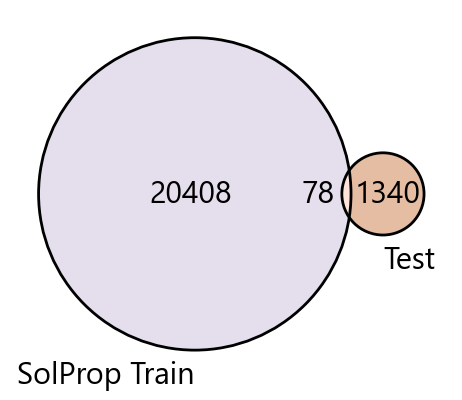

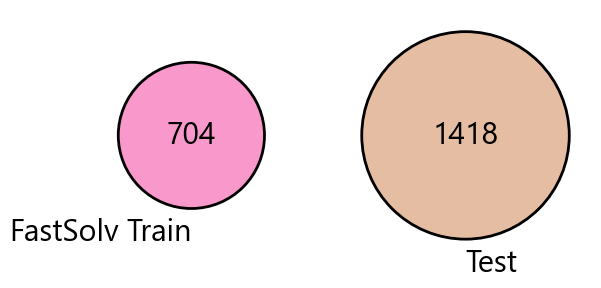

In [40]:
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

fig = venn2(
    [set(unique_solutes_solprop_training), set(unique_solutes_leeds)],
    ("SolProp Train", "Test"),
    set_colors = (colors[1], colors[6]),
    alpha = 0.4
    # first set, second set, overlap 1/2, 3rd, overlap 1/3, overlap 2/3, total overlap
    #subset_areas=(20, 23, 70, 23, 26, 0, 6),
)
venn2_circles([set(unique_solutes_solprop_training), set(unique_solutes_leeds)], linewidth=2)
lbl = fig.get_label_by_id("11")
fig.get_label_by_id("11").set_fontsize(22)
x,y = lbl.get_position()
lbl.set_position((x-0.1, y))
fig.get_label_by_id("A").set_fontsize(22)
fig.get_label_by_id("B").set_fontsize(22)
fig.get_label_by_id("01").set_fontsize(22)
fig.get_label_by_id("10").set_fontsize(22)
plt.show()

fig = venn2(
    [set(unique_solutes_krasnov), set(unique_solutes_leeds)],
    ("FastSolv Train", "Test"),
    set_colors = (colors[5], colors[6]),
    alpha = 0.4
    # first set, second set, overlap 1/2, 3rd, overlap 1/3, overlap 2/3, total overlap
    #subset_areas=(20, 23, 70, 23, 26, 0, 6),
)
venn2_circles([set(unique_solutes_krasnov), set(unique_solutes_leeds)], linewidth=2)
fig.get_label_by_id("A").set_fontsize(22)
fig.get_label_by_id("B").set_fontsize(22)
fig.get_label_by_id("01").set_fontsize(22)
fig.get_label_by_id("10").set_fontsize(22)

plt.show()

Plotting all together for Figure 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_28020\3332496133.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels([-8, -6, -4, -2, 0, 2])


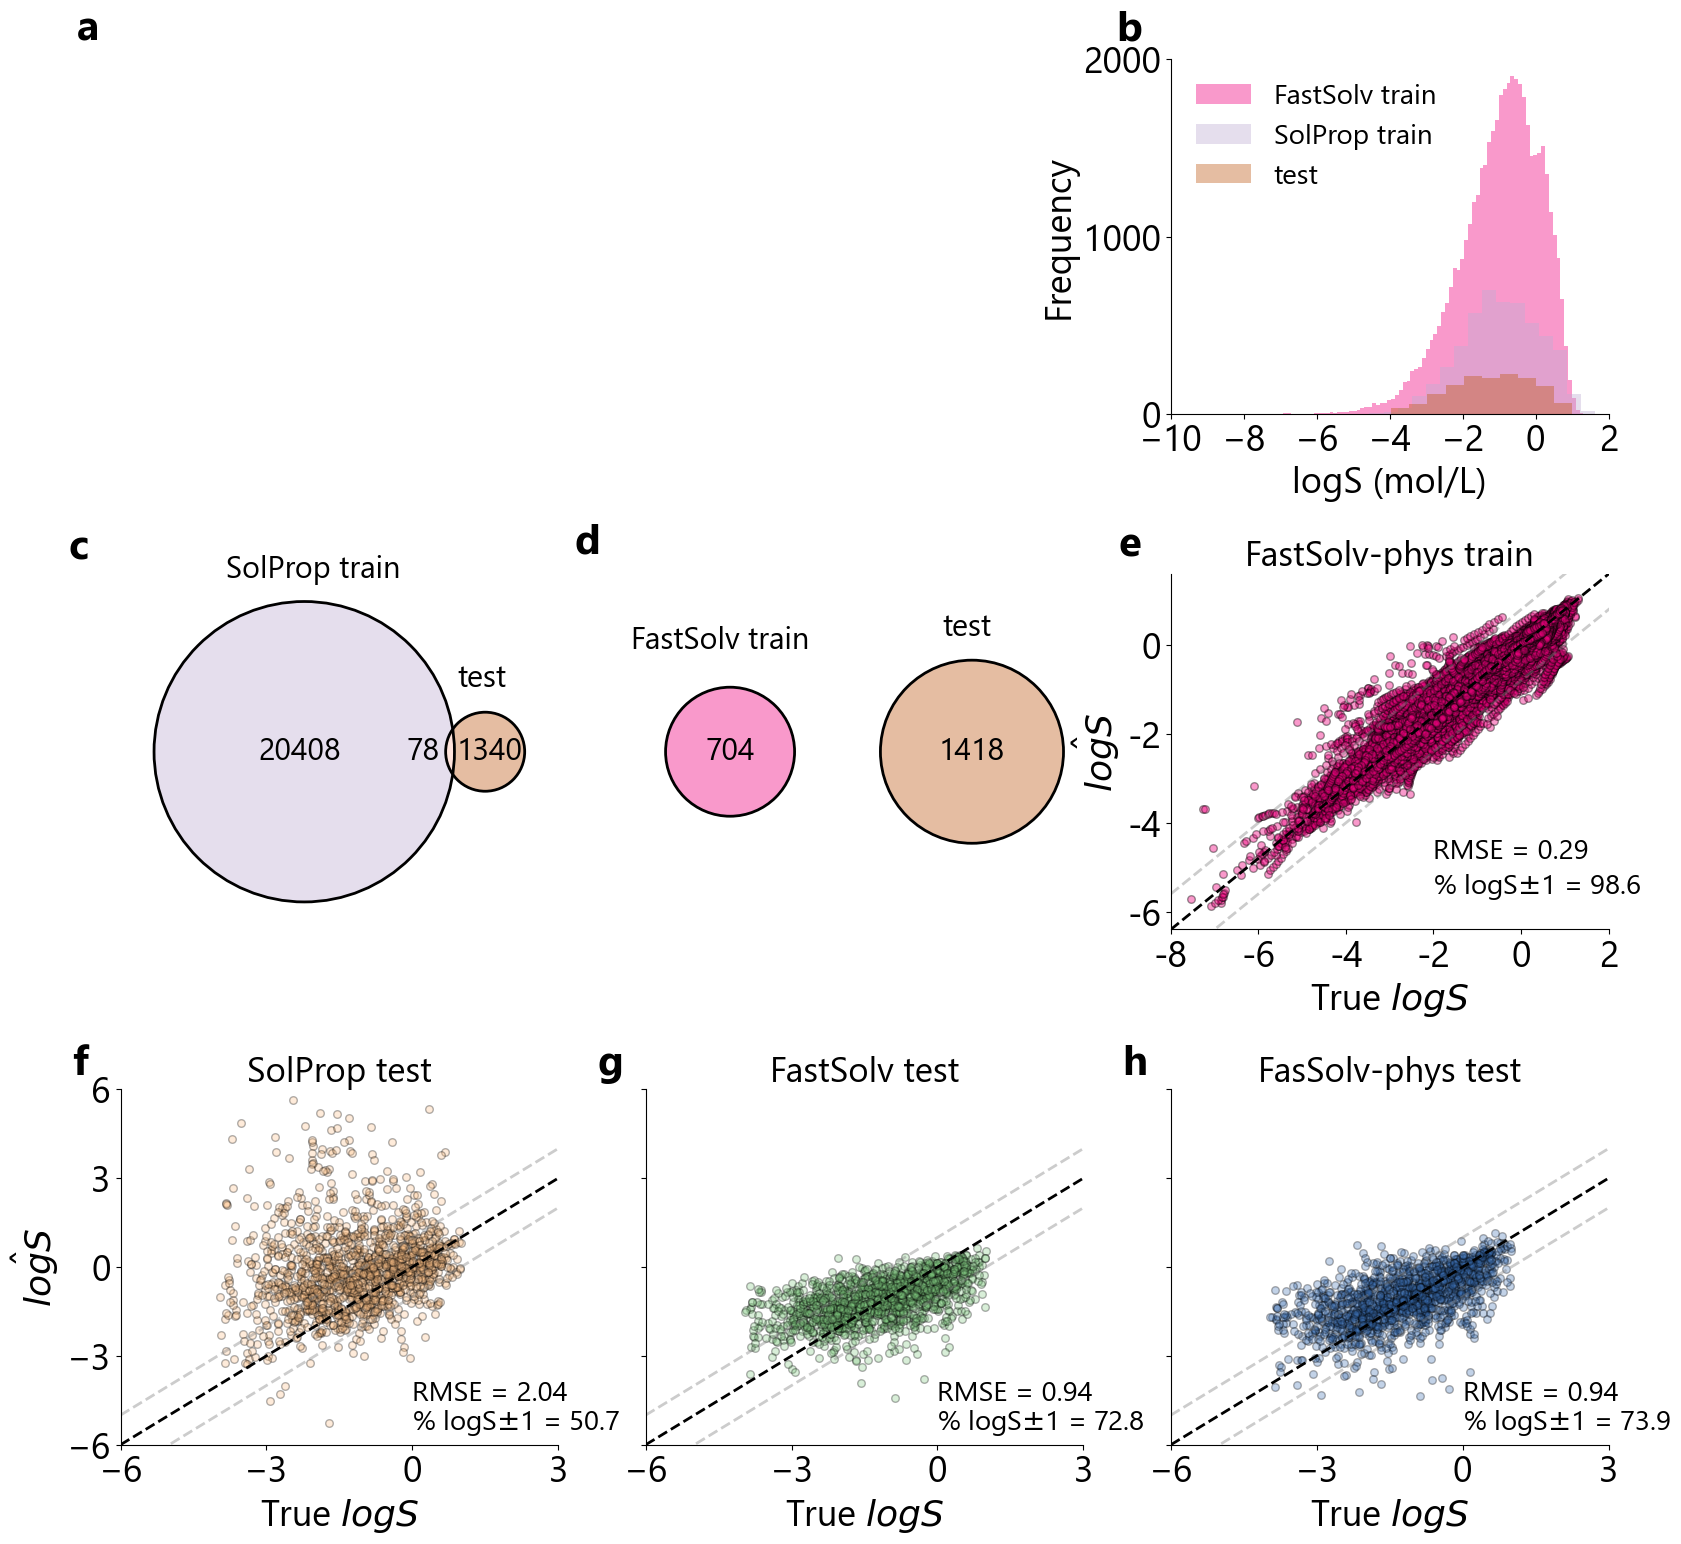

In [41]:
plt.figure(figsize=[6.4*3,4.8*3.75])
ax1 = plt.subplot2grid(shape=(3,3), loc=(2,0), colspan=1)

ax1.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax1.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax1.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)

ax1.scatter(leeds_all_solprop['logS_true'],leeds_all_solprop['logST (method1) [log10(mol/L)]'], alpha =0.3, s = 30, edgecolors = 'black', color = colors[2])


ax1.set_xlim([-6, 3])
ax1.set_xticks([-6, -3, 0, 3])
ax1.set_ylim([-6,6])
ax1.set_yticks([-6, -3, 0, 3, 6])

ax1.set_ylabel(r"$\hat{logS}$")
ax1.set_xlabel(r"True $logS$")
ax1.legend(prop={'size': 20}, loc = 'upper right', frameon = False, bbox_to_anchor=(1.1,0.6)) 
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title("SolProp test", fontsize = 25)
ax1.text(-0,-4.5, f"RMSE = {np.sqrt(mse_solprop):.2f}", fontsize = 20)
ax1.text(-0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_solprop:.1f}", fontsize = 20)
ax1.text(-7, 6.5, "f", weight='bold', fontsize = 30)


ax2 = plt.subplot2grid(shape=(3,3), loc=(2,1), colspan=1)

ax2.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax2.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax2.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)

ax2.scatter(leeds_all['logS_true'],leeds_all['logS_pred'], alpha =0.3, s = 30, edgecolors = 'black', color = colors[0])

ax2.set_xlim([-6, 3])
ax2.set_xticks([-6, -3, 0, 3])
ax2.set_ylim([-6,6])
ax2.set_yticks([-6, -3, 0, 3, 6])
ax2.set_yticklabels([])

#ax2.set_ylabel(r"$\hat{logS}$")
ax2.set_xlabel(r"True $logS$")
ax2.legend(prop={'size': 20}, loc = 'upper right', frameon = False, bbox_to_anchor=(1.1,0.6)) 
ax2.spines[['right', 'top']].set_visible(False)
ax2.text(-0,-4.5, f"RMSE = {np.sqrt(mse):.2f}", fontsize = 20)
ax2.text(-0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit:.1f}", fontsize = 20)
ax2.text(-7, 6.5, "g", weight='bold', fontsize = 30)

ax2.set_title("FastSolv test", fontsize = 25)

ax3 = plt.subplot2grid(shape=(3,3), loc=(2,2), colspan=1)

ax3.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax3.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax3.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)

ax3.scatter(leeds_all_custom['logS_true'],leeds_all_custom['logS_pred'], alpha =0.3, s = 30, edgecolors = 'black', color = colors[4])

ax3.set_xlim([-6, 3])
ax3.set_xticks([-6, -3, 0, 3])

ax3.set_ylim([-6,6])
ax3.set_yticks([-6, -3, 0, 3, 6])
ax3.set_yticklabels([])

#ax3.set_ylabel(r"$\hat{logS}$")
ax3.set_xlabel(r"True $logS$")
ax3.legend(prop={'size': 20}, loc = 'upper right', frameon = False, bbox_to_anchor=(1.08,0.3)) 
ax3.text(-0,-4.5, f"RMSE = {np.sqrt(mse_custom):.2f}", fontsize = 20)
ax3.text(-0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_custom:.1f}", fontsize = 20)
ax3.text(-7, 6.5, "h", weight='bold', fontsize = 30)

#ax3.text(1,-5.5, "RMSE = 2.01", fontsize = 20)
ax3.spines[['right', 'top']].set_visible(False)
ax3.set_title("FasSolv-phys test", fontsize = 25)




ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2), colspan=1)

ax4.plot([-8, 8], [-8,8], linestyle = '--', linewidth = 2, color = 'black')
ax4.plot([-8, 8], [-9,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax4.plot([-8, 8], [-7,9], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax4.scatter(training_performance['logS_true'],training_performance['logS_pred'], alpha =0.4, s = 30, edgecolors = 'black', color = colors[5])

ax4.set_xlim([-8, 2])
ax4.set_xticks([-8, -6, -4, -2, 0, 2])
ax4.set_xticklabels([-8, -6, -4, -2, 0, 2])
ax4.set_ylim([-8,2])
ax4.set_yticklabels([-8, -6, -4, -2, 0, 2])

ax4.set_ylabel(r"$\hat{logS}$")
ax4.set_xlabel(r"True $logS$")
#ax4.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax4.spines[['right', 'top']].set_visible(False)
ax4.text(-2,-6, f"RMSE = {np.sqrt(mse_training):.2f}", fontsize = 20)
ax4.text(-2,-7, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_training:.1f}", fontsize = 20)
ax4.set_title("FastSolv-phys train", fontsize = 25)
ax4.text(-9.2, 2.5, "e", weight='bold', fontsize = 30)


ax5 = plt.subplot2grid(shape=(3,3), loc=(0,2), colspan=1)

ax5.hist(training_performance['logS_true'], bins=120, color = colors[5], alpha = 0.4, label = 'FastSolv train')
ax5.hist(solprop['logS_true'], bins=20, color = colors[1], alpha = 0.4, label = 'SolProp train')
ax5.hist(leeds_all['logS_true'], bins=10, color = colors[6], alpha = 0.4, label = 'test')


ax5.spines[['top', 'right',]].set_visible(False)
ax5.set_xlabel("logS (mol/L)")
ax5.set_ylabel("Frequency")

ax5.set_xlim([-10, 2])
ax5.set_xticks([-10, -8, -6, -4, -2, 0, 2 ])
ax5.legend(prop={'size': 20}, loc = 'upper left', frameon = False) 
ax5.text(-11.5, 2110, "b", weight='bold', fontsize = 30)
ax5.text(-40, 2110, "a", weight='bold', fontsize = 30)

#plt.ylim([-10, 1200])
#plt.yticks([0, 400, 800, 1200])

ax6 = plt.subplot2grid(shape=(3,3), loc=(1,0), colspan=1)

fig = venn2(
    [set(unique_solutes_solprop_training), set(unique_solutes_leeds)],
    ("SolProp train", "test"),
    set_colors = (colors[1], colors[6]),
    alpha = 0.4,
    # first set, second set, overlap 1/2, 3rd, overlap 1/3, overlap 2/3, total overlap
    #subset_areas=(20, 23, 70, 23, 26, 0, 6),
    ax = ax6
)
venn2_circles([set(unique_solutes_solprop_training), set(unique_solutes_leeds)], linewidth=2, ax = ax6)
lbl = fig.get_label_by_id("11")
fig.get_label_by_id("11").set_fontsize(22)
x,y = lbl.get_position()
lbl.set_position((x-0.1, y))


fig.get_label_by_id("A").set_fontsize(22)
lbl = fig.get_label_by_id("A")
x,y = lbl.get_position()
lbl.set_position((x+0.35, y+1.3))

fig.get_label_by_id("B").set_fontsize(22)
lbl = fig.get_label_by_id("B")
x,y = lbl.get_position()
lbl.set_position((x-0.1, y+0.5))

fig.get_label_by_id("01").set_fontsize(22)
fig.get_label_by_id("10").set_fontsize(22)
ax6.text(-0.9, 0.7, "c", weight='bold', fontsize = 30)


ax7 = plt.subplot2grid(shape=(3,3), loc=(1,1), colspan=1)
fig = venn2(
    [set(unique_solutes_krasnov), set(unique_solutes_leeds)],
    ("FastSolv train", "test"),
    set_colors = (colors[5], colors[6]),
    alpha = 0.4, 
    ax = ax7
    # first set, second set, overlap 1/2, 3rd, overlap 1/3, overlap 2/3, total overlap
    #subset_areas=(20, 23, 70, 23, 26, 0, 6),
)
venn2_circles([set(unique_solutes_krasnov), set(unique_solutes_leeds)], linewidth=2)

fig.get_label_by_id("A").set_fontsize(22)
lbl = fig.get_label_by_id("A")
x,y = lbl.get_position()
lbl.set_position((x+0.4, y+1))

fig.get_label_by_id("B").set_fontsize(22)
lbl = fig.get_label_by_id("B")
x,y = lbl.get_position()
lbl.set_position((x-0.15, y+1.2))

fig.get_label_by_id("01").set_fontsize(22)
fig.get_label_by_id("10").set_fontsize(22)
ax7.text(-1.6, 1, "d", weight='bold', fontsize = 30)


plt.subplots_adjust(hspace=0.45)
plt.show()
